In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
file = sio.loadmat('bodyfat_data.mat')
x = file["X"]
y = file["y"]
x_train = x[0:150, :].T
x_test = x[150:, :].T
y_train = y[0:150, :].T
y_test = y[150:, :].T
m,n = x_train.shape
np.random.seed(0)
w1 = np.random.rand(64,m)
b1 = np.zeros((64,1))
w2 = np.random.rand(16,64)
b2 = np.zeros((16,1))
w3 = np.random.rand(1,16)
b3 = 0
alpha = 1e-7

In [3]:
def fp(w1,w2,w3,b1,b2,b3,x,y):
    a1 = w1@x+b1
    z1 = np.maximum(a1,0)
    a2 = w2@z1+b2
    z2 = np.maximum(a2,0)
    pre = w3@z2+b3
    lms = np.average((pre-y)**2)
    return pre,lms,a1,z1,a2,z2

In [4]:
def bp(w1,w2,w3,b1,b2,b3,a1,z1,a2,z2,x,y,pre):
    tem3 = -2*(y-pre)
    dw3 = tem3@z2.T
    db3 = np.sum(tem3,axis=1)

    desig2 = (a2 > 0).astype(np.int16) 
    tem2 = w3.T@tem3*desig2
    dw2 = tem2@z1.T
    db2 = np.sum(tem2,axis=1)[:,None]

    desig1 = (a1 > 0).astype(np.int16)
    tem1 = w2.T@tem2*desig1
    dw1 = tem1@x.T
    db1 = np.sum(tem1,axis=1)[:,None]
    
    return dw1,dw2,dw3,db1,db2,db3

In [7]:
x_train.shape
y_train.shape

(1, 150)

In [157]:
lis = list()
while True:
    pre,lms,a1,z1,a2,z2 = fp(w1,w2,w3,b1,b2,b3,x_train,y_train)
    if lms < 65:
        break
    lis.append(lms)
    dw1,dw2,dw3,db1,db2,db3 = bp(w1,w2,w3,b1,b2,b3,a1,z1,a2,z2,x_train,y_train,pre)
    w1 -= alpha*dw1
    w2 -= alpha*dw2
    w3 -= alpha*dw3

    b3 -= alpha*db3
    b2 -= alpha*db2
    b1 -= alpha*db1

In [158]:
_,lms_t,_,_,_,_ = fp(w1,w2,w3,b1,b2,b3,x_test,y_test)
print("Mean square error of Training data:",lis[-1])
print("Mean square error of Training data:",lms_t)

Mean square error of Training data: 65.00004146807325
Mean square error of Training data: 82.40184069015024


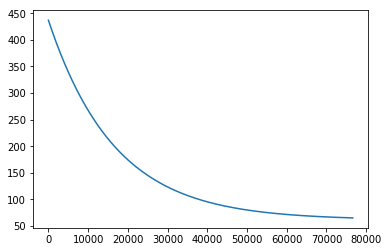

In [159]:
x = np.arange(len(lis)-1)
plt.plot(x,lis[1:])